In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk as nlp
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_true.head()
## The String "()" still remains in the text column to be removed which i take care of during the NLP part done below

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


In [5]:
df_fake["target"] = 0
df_true["target"] = 1

In [6]:
df_true.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON () - The Whit...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla () - President Donald Tru...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON () - Alabama Secretary of State Joh...,politicsNews,"December 28, 2017",1


In [7]:
df_fake.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [8]:
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)

COMBINE TRUE AND FAKE DATASET INTO A SINGLE DATASET
# combine the true and fake dataset into a single dataset

In [9]:
df = pd.concat([df_fake,df_true],axis = 0)

In [10]:
df.head(10)

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [11]:
df = df.sample(frac=1)
df.head(10)

,text,target
7448,Ted Cruz is creepy. Really creepy. So creepy t...,0
19213,AMMAN () - U.S.-backed forces said on Saturday...,1
2326,Just when you thought Trump might have calmed ...,0
12489,JOHANNESBURG () - South Africa s ruling Africa...,1
8739,A Rhode Island city official has resigned afte...,0
17078,BOGOTA () - Armed gunmen this week killed six ...,1
19879,BEIRUT () - The former al Qaeda branch in Syri...,1
5045,John Oliver had a field day mocking Donald Tru...,0
16064,ISTANBUL () - President Tayyip Erdogan filed a...,1
10254,WASHINGTON () - Republican U.S. Senate Majorit...,1


In [12]:
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)
df.head(10)

,text,target
0,Ted Cruz is creepy. Really creepy. So creepy t...,0
1,AMMAN () - U.S.-backed forces said on Saturday...,1
2,Just when you thought Trump might have calmed ...,0
3,JOHANNESBURG () - South Africa s ruling Africa...,1
4,A Rhode Island city official has resigned afte...,0
5,BOGOTA () - Armed gunmen this week killed six ...,1
6,BEIRUT () - The former al Qaeda branch in Syri...,1
7,John Oliver had a field day mocking Donald Tru...,0
8,ISTANBUL () - President Tayyip Erdogan filed a...,1
9,WASHINGTON () - Republican U.S. Senate Majorit...,1


In [13]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    # This is where i remove the "()" from the text column. You can do in whatever way you want 
    # The key is to remove the "(Reuters)" string as it is present in all text of True.csv.
    # The Model during the training part can memorize it and perfrom great in training and badly when other testing input is given.
    text = re.sub('[()]','',text)
    text = re.sub('\\W',' ',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
df["text"] = df["text"].apply(wordopt)
df.head(100)

,text,target
0,ted cruz is creepy really creepy so creepy t...,0
1,amman u s backed forces said on saturday t...,1
2,just when you thought trump might have calmed ...,0
3,johannesburg south africa s ruling african ...,1
4,a rhode island city official has resigned afte...,0
...,...,...
95,our weekly documentary film curated by our ed...,0
96,the republican party should be prepared to los...,0
97,after watching this video one thing is abunda...,0
98,the warning signs were everywhere forty one ye...,0


In [15]:
X = df["text"]
Y = df["target"]
X.shape

(44898,)

In [16]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.25)
X_train.shape

(33673,)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
#print(X_train)
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
#print(analyze(X_train[0]))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
print(xv_train.shape)
print(xv_test.shape)

(33673, 95753)
(11225, 95753)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(xv_train,Y_train)
print("The Accuracy of the Logistic Regression Model is {}".format(lr.score(xv_test,y_test)))

The Accuracy of the Logistic Regression Model is 0.9824498886414254


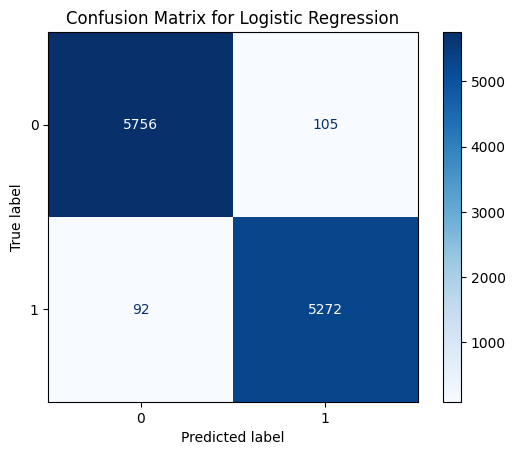

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use your trained model here, for example: lr, dtc, gclf, or rclf
y_pred = lr.predict(xv_test)  # Replace `lr` with the model you want

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [19]:
print(classification_report(y_test,lr.predict(xv_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5861
           1       0.98      0.98      0.98      5364

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(dtc.score(xv_test,y_test)))
print(classification_report(y_test,dtc.predict(xv_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9516258351893095
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5861
           1       0.96      0.94      0.95      5364

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gclf = GradientBoostingClassifier()
gclf.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(gclf.score(xv_test,y_test)))
print(classification_report(y_test,gclf.predict(xv_test)))

The Accuracy of the Decision Tree Classifier Model is 0.971403118040089
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5861
           1       0.97      0.97      0.97      5364

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



In [22]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(xv_train,Y_train)
print("The Accuracy of the Random Forest Classifier Model is {}".format(rclf.score(xv_test,y_test)))
print(classification_report(y_test,rclf.predict(xv_test)))

The Accuracy of the Random Forest Classifier Model is 0.9804008908685968
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5861
           1       0.98      0.98      0.98      5364

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



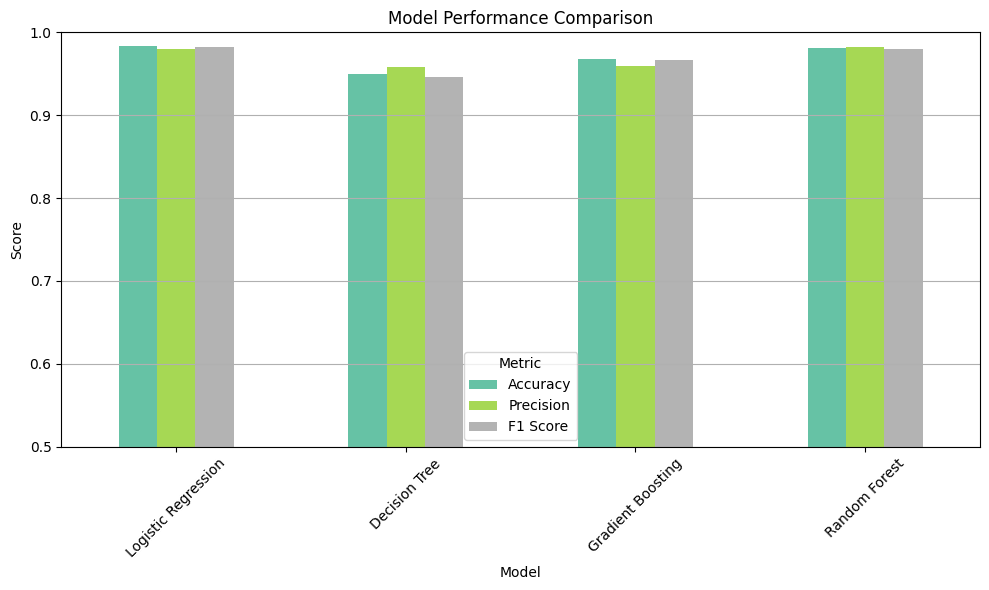

In [41]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import pandas as pd
import matplotlib.colors

import matplotlib.pyplot as plt

# Define models and predictions
models = {
    "Logistic Regression": lr.predict(xv_test),
    "Decision Tree": dtc.predict(xv_test),
    "Gradient Boosting": gclf.predict(xv_test),
    "Random Forest": rclf.predict(xv_test)
}

# Prepare results
results = {"Model": [], "Accuracy": [], "Precision": [], "F1 Score": []}

for name, preds in models.items():
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, preds))
    results["Precision"].append(precision_score(y_test, preds))
    results["F1 Score"].append(f1_score(y_test, preds))

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot
df_results.set_index("Model").plot(kind="bar", figsize=(10, 6), ylim=(0.5, 1.0), colormap="Set2")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


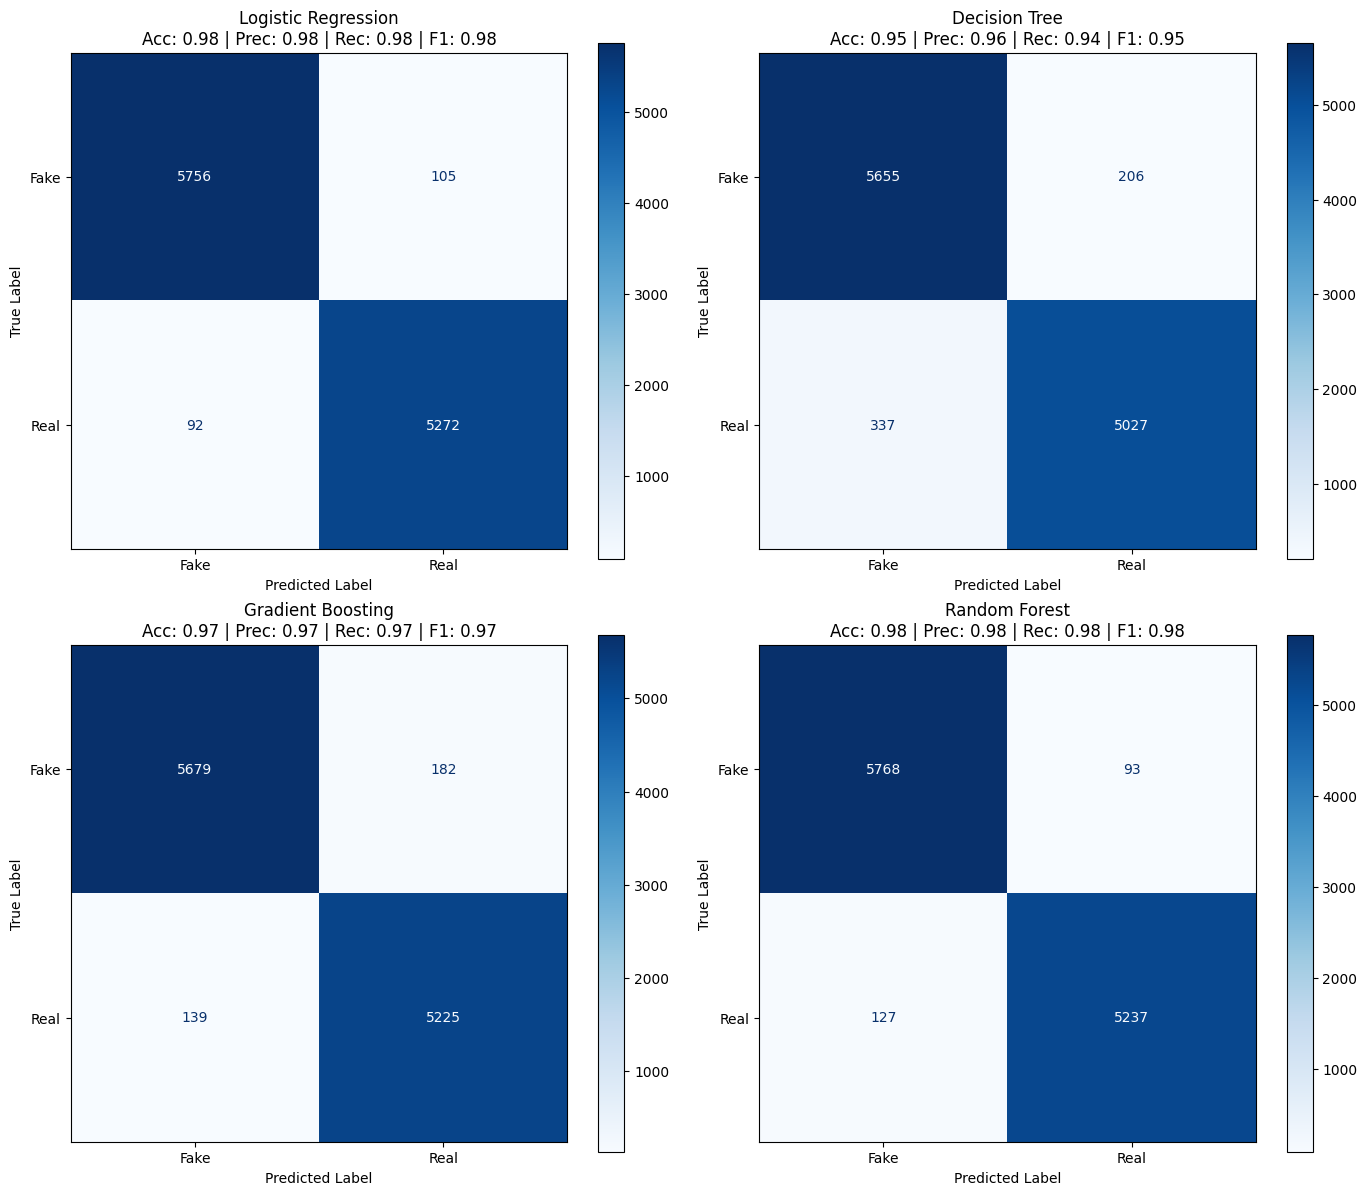

In [23]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# List of models and their names
models = [
    (lr, "Logistic Regression"),
    (dtc, "Decision Tree"),
    (gclf, "Gradient Boosting"),
    (rclf, "Random Forest")
]

# Custom class labels
labels = ["Fake", "Real"]

# Set up subplots for 4 models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

# Plot confusion matrices with performance metrics
for i, (model, name) in enumerate(models):
    y_pred = model.predict(xv_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(f"{name}\nAcc: {acc:.2f} | Prec: {prec:.2f} | Rec: {rec:.2f} | F1: {f1:.2f}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()

# Save the plot
plt.savefig("model_comparison.png", dpi=300)
plt.show()


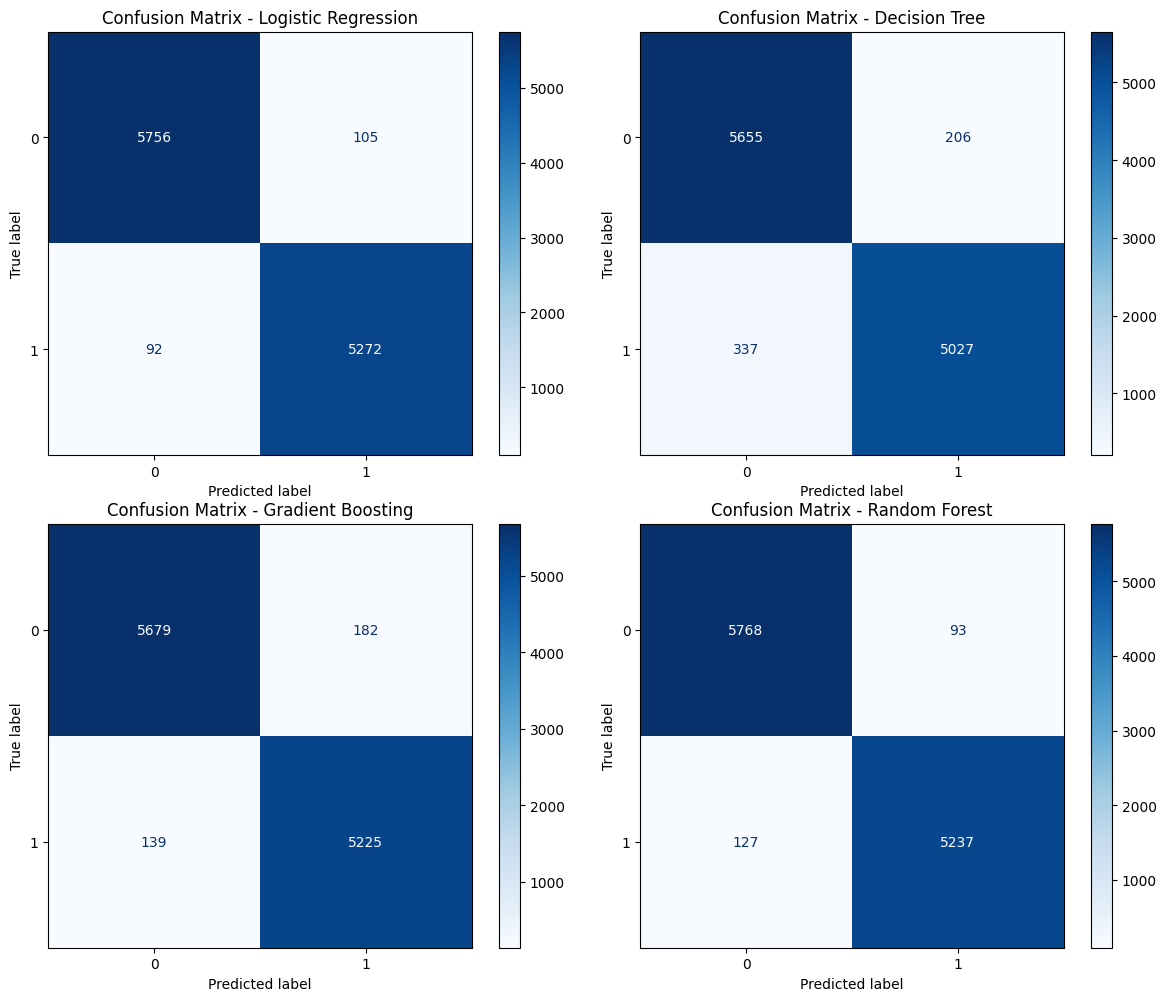

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models and their names
models = [
    (lr, "Logistic Regression"),
    (dtc, "Decision Tree"),
    (gclf, "Gradient Boosting"),
    (rclf, "Random Forest")
]

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Plot each model's confusion matrix
for i, (model, name) in enumerate(models):
    y_pred = model.predict(xv_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()


In [2]:
# def plot_confusion_matrix(y_true, y_pred, model_name):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#                 xticklabels=['Fake News', 'Real News'], 
#                 yticklabels=['Fake News', 'Real News'])
#     plt.title(f'Confusion Matrix - {model_name}')
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.tight_layout()
#     plt.show()
    
#     # Print confusion matrix details
#     print(f"\n{model_name} Confusion Matrix:")
#     print(f"True Negatives (Fake correctly identified): {cm[0,0]}")
#     print(f"False Positives (Fake predicted as Real): {cm[0,1]}")
#     print(f"False Negatives (Real predicted as Fake): {cm[1,0]}")
#     print(f"True Positives (Real correctly identified): {cm[1,1]}")
#     print("-" * 50)

# # Plot confusion matrices for all models
# models_data = [
#     (lr_pred, "Logistic Regression"),
#     (dtc_pred, "Decision Tree"),
#     (gclf_pred, "Gradient Boosting"),
#     (rclf_pred, "Random Forest")
# ]

# for pred, name in models_data:
#     plot_confusion_matrix(y_test, pred, name)

# # Create a combined confusion matrix comparison
# fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# fig.suptitle('Confusion Matrix Comparison - All Models', fontsize=16)

# model_preds = [lr_pred, dtc_pred, gclf_pred, rclf_pred]
# model_names = ["Logistic Regression", "Decision Tree", "Gradient Boosting", "Random Forest"]

# for i, (pred, name) in enumerate(zip(model_preds, model_names)):
#     row = i // 2
#     col = i % 2
#     cm = confusion_matrix(y_test, pred)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col],
#                 xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
#     axes[row, col].set_title(f'{name}')
#     axes[row, col].set_xlabel('Predicted')
#     axes[row, col].set_ylabel('Actual')

# plt.tight_layout()
# plt.show()

# # Performance comparison with confusion matrix metrics
# results = {"Model": [], "Accuracy": [], "Precision": [], "F1 Score": [], 
#            "True Negatives": [], "False Positives": [], "False Negatives": [], "True Positives": []}

# models = {
#     "Logistic Regression": lr_pred,
#     "Decision Tree": dtc_pred,
#     "Gradient Boosting": gclf_pred,
#     "Random Forest": rclf_pred
# }

# for name, preds in models.items():
#     cm = confusion_matrix(y_test, preds)
#     results["Model"].append(name)
#     results["Accuracy"].append(accuracy_score(y_test, preds))
#     results["Precision"].append(precision_score(y_test, preds))
#     results["F1 Score"].append(f1_score(y_test, preds))
#     results["True Negatives"].append(cm[0,0])
#     results["False Positives"].append(cm[0,1])
#     results["False Negatives"].append(cm[1,0])
#     results["True Positives"].append(cm[1,1])

# # Convert to DataFrame and display
# df_results = pd.DataFrame(results)
# print("\nDetailed Performance Metrics:")
# print(df_results.to_string(index=False))

# # Plot performance comparison
# df_results.set_index("Model")[["Accuracy", "Precision", "F1 Score"]].plot(
#     kind="bar", figsize=(12, 6), ylim=(0.5, 1.0), colormap="Set2")
# plt.title("Model Performance Comparison")
# plt.ylabel("Score")
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.legend(title="Metric")
# plt.tight_layout()
# plt.show()

In [ ]:
import os
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
model_files_exist = (
    os.path.exists("lr_model.pkl") and
    os.path.exists("dtc_model.pkl") and
    os.path.exists("gclf_model.pkl") and
    os.path.exists("rclf_model.pkl") and
    os.path.exists("vectorizer.pkl")
)

if model_files_exist:
    # Load models and vectorizer
    lr = joblib.load("lr_model.pkl")
    dtc = joblib.load("dtc_model.pkl")
    gclf = joblib.load("gclf_model.pkl")
    rclf = joblib.load("rclf_model.pkl")
    vectorization = joblib.load("vectorizer.pkl")
    print("✅ Models and vectorizer loaded from disk.")
else:
    # Train models as before
    vectorization = TfidfVectorizer()
    xv_train = vectorization.fit_transform(X_train)
    xv_test = vectorization.transform(x_test)

    lr = LogisticRegression()
    lr.fit(xv_train, Y_train)

    dtc = DecisionTreeClassifier()
    dtc.fit(xv_train, Y_train)

    gclf = GradientBoostingClassifier()
    gclf.fit(xv_train, Y_train)

    rclf = RandomForestClassifier()
    rclf.fit(xv_train, Y_train)

    # Save models and vectorizer
    joblib.dump(lr, "lr_model.pkl")
    joblib.dump(dtc, "dtc_model.pkl")
    joblib.dump(gclf, "gclf_model.pkl")
    joblib.dump(rclf, "rclf_model.pkl")
    joblib.dump(vectorization, "vectorizer.pkl")
    print("✅ Models and vectorizer trained and saved to disk.")

✅ Models and vectorizer trained and saved to disk.


In [ ]:
# def output_lable(n):
#     if n == 0:
#         return "Fake News"
#     elif n == 1:
#         return "Not A Fake News"
    
# def manual_testing(news):
#     testing_news = {"text":[news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test["text"] = new_def_test["text"].apply(wordopt) 
#     new_x_test = new_def_test["text"]
#     new_xv_test = vectorization.transform(new_x_test)
#     pred_LR = lr.predict(new_xv_test)
#     pred_DT = dtc.predict(new_xv_test)
#     pred_GBC = gclf.predict(new_xv_test)
#     pred_RFC = rclf.predict(new_xv_test)

#     return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
#                                                                                                               output_lable(pred_GBC[0]), 
#                                                                                                               output_lable(pred_RFC[0])))

In [ ]:
# news = str(input('A quick brown fox jumps over the lazy dog'))
# manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
# news = str(input())
# manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
# news = str(input())
# manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
